In [2]:
from google.colab import drive
drive.mount('/content/drive')
#  https://drive.google.com/drive/folders/1LAulELrry1dgpscVU4WVEMW85rNIPQkz?usp=sharing

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/CNN-Dog-Cat/datasets
!unzip "/content/drive/MyDrive/CNN-Dog-Cat/cats_dogs_1000.zip"

/content/drive/MyDrive/CNN-Dog-Cat/datasets
Archive:  /content/drive/MyDrive/CNN-Dog-Cat/cats_dogs_1000.zip
   creating: cats_dogs_filtered/
   creating: cats_dogs_filtered/train/
   creating: cats_dogs_filtered/train/cats/
  inflating: cats_dogs_filtered/train/cats/cat.0.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.1.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.10.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.100.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.101.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.102.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.103.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.104.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.105.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.106.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.107.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.108.jpg  
  inflating: cats_dogs_filtered/train/cats/cat.109.jpg  
  inflating: cats_dogs_filtered/train/ca

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
img_generator = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.18,
                                   height_shift_range=0.18,
                                   shear_range=0.18,
                                   zoom_range=0.18,
                                   horizontal_flip=True
                                  #  validation_split=0.2
                                   )

In [6]:
train_ds = img_generator.flow_from_directory(directory='/content/drive/MyDrive/CNN-Dog-Cat/datasets/cats_dogs_filtered/train',
                                             target_size=(150, 150), class_mode='binary')

Found 2000 images belonging to 2 classes.


In [7]:
validation_ds = img_generator.flow_from_directory(directory='/content/drive/MyDrive/CNN-Dog-Cat/datasets/cats_dogs_filtered/validation',
                                            target_size=(150, 150), class_mode='binary' )

Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy

In [49]:
from keras.models import Model
from keras.applications.vgg19 import VGG19
# include_top = False means that we doesnt include fully connected top layer we will add them accordingly
vgg19 = VGG19(include_top = False, input_shape = (150,150,3), weights = 'imagenet')

# training of all the convolution is set to false
for layer in vgg19.layers:
    layer.trainable = False
#transforlearning (learn)


x = Flatten()(vgg19.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)

predictions = Dense(1, activation='sigmoid')(x)


model_vgg19 = Model(inputs = vgg19.input, outputs = predictions)


In [50]:
model_vgg19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [51]:
loss = BinaryCrossentropy(from_logits=True)
model_vgg19.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [54]:
hist = model_vgg19.fit_generator(train_ds, validation_data=validation_ds, epochs=1000, callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 32s 463ms/step - loss: 0.6365 - accuracy: 0.6770 - val_loss: 0.4368 - val_accuracy: 0.7970
Epoch 2/1000
63/63 [==============================] - 29s 464ms/step - loss: 0.4732 - accuracy: 0.7660 - val_loss: 0.4305 - val_accuracy: 0.7940
Epoch 3/1000
63/63 [==============================] - 27s 428ms/step - loss: 0.4125 - accuracy: 0.8015 - val_loss: 0.4283 - val_accuracy: 0.7900
Epoch 4/1000
63/63 [==============================] - 29s 454ms/step - loss: 0.3869 - accuracy: 0.8195 - val_loss: 0.4619 - val_accuracy: 0.7630
Epoch 5/1000
63/63 [==============================] - 28s 441ms/step - loss: 0.3536 - accuracy: 0.8465 - val_loss: 0.4601 - val_accuracy: 0.7790
Epoch 6/1000
63/63 [==============================] - 27s 436ms/step - loss: 0.3692 - accuracy: 0.8325 - val_loss: 0.3646 - val_accuracy: 0.8220
Epoch 7/1000
63/63 [==============================] - 27s 434ms/step - loss: 0.3525 - accuracy: 0.8395 - val_loss: 0.4095 - val_accuracy: 0.821

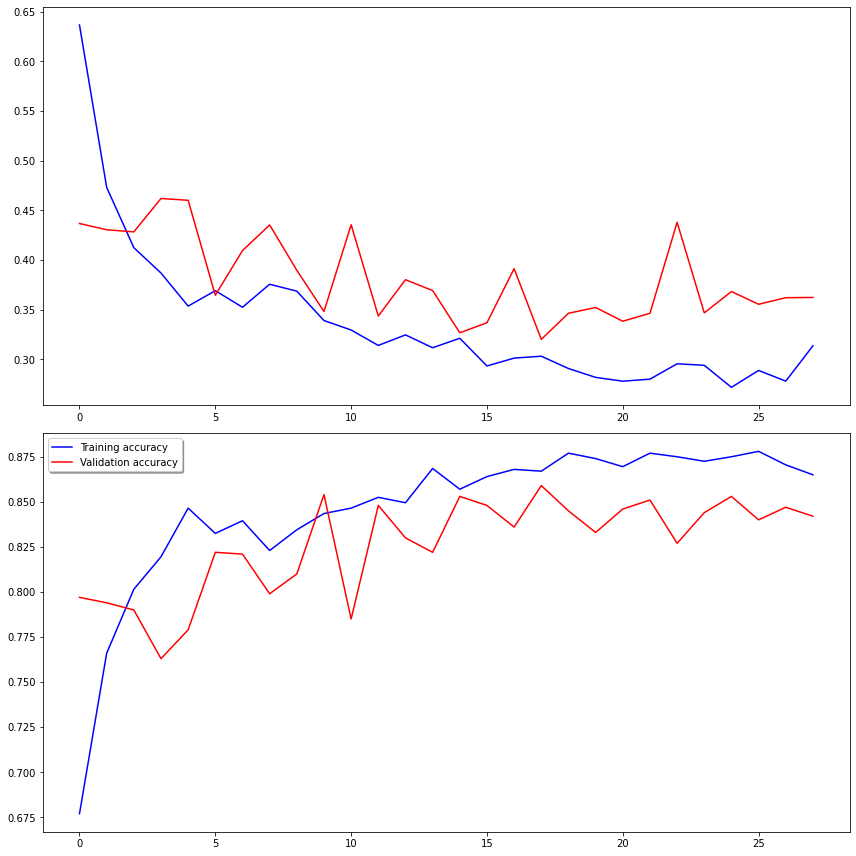

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [56]:
model_vgg19.save('/content/drive/MyDrive/CNN-Dog-Cat/cat_dog_vgg19.h5')

In [57]:
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
# include_top = False means that we doesnt include fully connected top layer we will add them accordingly
inception_v3 = InceptionV3(include_top = False, input_shape = (150,150,3), weights = 'imagenet')

# training of all the convolution is set to false
for layer in inception_v3.layers:
    layer.trainable = False
#transforlearning (learn)


x = Flatten()(inception_v3.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)

predictions = Dense(1, activation='sigmoid')(x)


model_inception_v3 = Model(inputs = inception_v3.input, outputs = predictions)

87910968/87910968 [==============================] - 5s 0us/step


In [58]:
model_inception_v3.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f6e500837d0>>

In [59]:
loss = BinaryCrossentropy(from_logits=True)
model_inception_v3.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [60]:
hist = model_inception_v3.fit_generator(train_ds, validation_data=validation_ds, epochs=1000, callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 35s 471ms/step - loss: 1.4960 - accuracy: 0.8370 - val_loss: 0.2831 - val_accuracy: 0.9080
Epoch 2/1000
63/63 [==============================] - 26s 418ms/step - loss: 0.2776 - accuracy: 0.9085 - val_loss: 0.2078 - val_accuracy: 0.9280
Epoch 3/1000
63/63 [==============================] - 27s 434ms/step - loss: 0.2024 - accuracy: 0.9085 - val_loss: 0.2192 - val_accuracy: 0.9190
Epoch 4/1000
63/63 [==============================] - 27s 422ms/step - loss: 0.1853 - accuracy: 0.9145 - val_loss: 0.2069 - val_accuracy: 0.9240
Epoch 5/1000
63/63 [==============================] - 26s 418ms/step - loss: 0.1634 - accuracy: 0.9335 - val_loss: 0.1569 - val_accuracy: 0.9330
Epoch 6/1000
63/63 [==============================] - 27s 425ms/step - loss: 0.1810 - accuracy: 0.9205 - val_loss: 0.2302 - val_accuracy: 0.9150
Epoch 7/1000
63/63 [==============================] - 26s 418ms/step - loss: 0.1610 - accuracy: 0.9395 - val_loss: 0.1651 - val_accuracy: 0.937

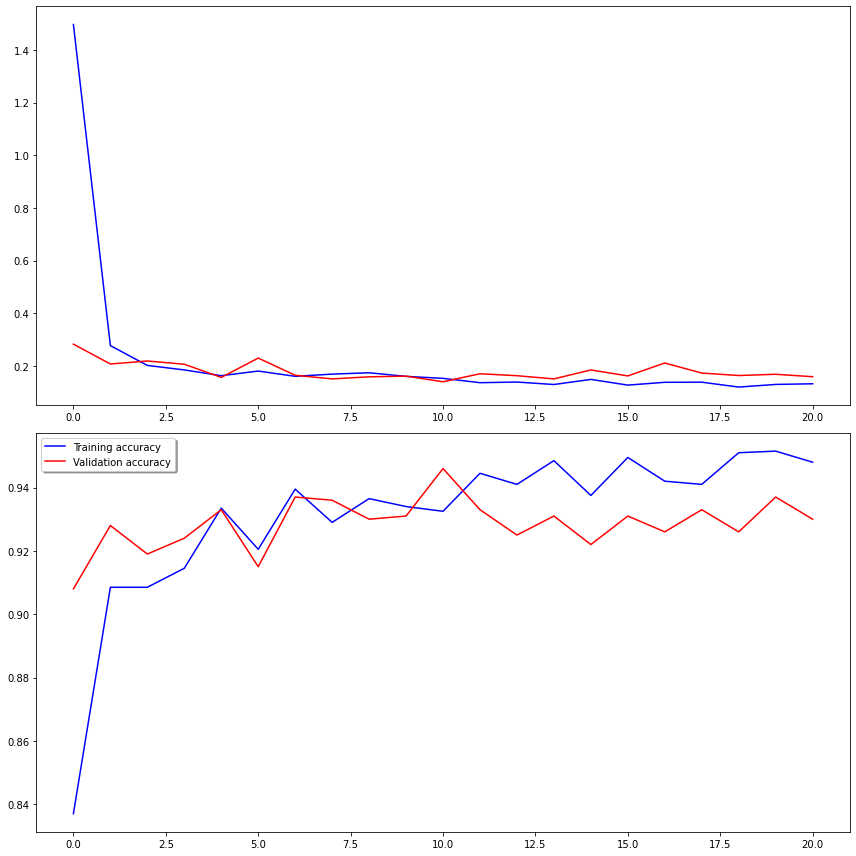

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
legend = plt.legend(loc='best', shadow=True)
ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")


legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [62]:
model_inception_v3.save('/content/drive/MyDrive/CNN-Dog-Cat/cat_dog_inception_v3.h5')

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model = load_model('/content/drive/MyDrive/CNN-Dog-Cat/cat_dog_inception_v3.h5')

In [65]:
import cv2 as cv

In [66]:
img = cv.imread('/content/drive/MyDrive/CNN-Dog-Cat/datasets/cats_dogs_filtered/validation/cats/cat.2000.jpg')

In [67]:
from matplotlib import pyplot as plt

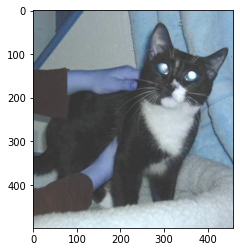

In [68]:
plt.imshow(img)

In [69]:
img_true = cv.cvtColor(img, cv.COLOR_BGR2RGB)

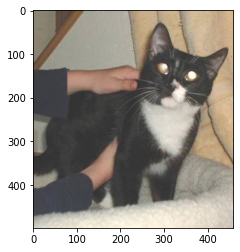

In [70]:
plt.imshow(img_true)

In [71]:
img_true = cv.resize(img_true, (150, 150))

In [72]:
img_true = img_true / 255.0

In [73]:
import numpy as np

In [74]:
y_pred = model.predict(np.array([img_true]))

1/1 [==============================] - 2s 2s/step


In [75]:
y_pred

array([[8.68884e-06]], dtype=float32)

In [76]:
if y_pred >= 0.5:
    print('Con chó')
else:
    print('Con mèo')

Con mèo
